In [1]:
pay = pd.read_csv('data/raw/payment.csv')

In [339]:
appt = pd.read_csv('data/interm/appt_cleaned.csv', low_memory=False)

In [257]:
pat = pd.read_csv('data/interm/patient_int.csv')

In [11]:
cols = pay.dtypes[pay.dtypes != 'object'].index

In [14]:
zeros = cols[pay.loc[:, cols].sum() == 0]

In [46]:
pay.drop('CheckNum', axis=1, inplace=True)

In [240]:
appt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62362 entries, 0 to 62361
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   AptNum        62362 non-null  int64 
 1   PatNum        62362 non-null  int64 
 2   AptStatus     62362 non-null  int64 
 3   Confirmed     62362 non-null  int64 
 4   Op            62362 non-null  int64 
 5   Note          62362 non-null  object
 6   ProvNum       62362 non-null  int64 
 7   AptDateTime   62362 non-null  object
 8   InsPlan1      62362 non-null  int64 
 9   InsPlan2      62362 non-null  int64 
 10  ProcsColored  2277 non-null   object
dtypes: int64(8), object(3)
memory usage: 5.2+ MB


In [69]:
pay.groupby('PatNum')['PayAmt'].agg(['sum', 'mean']).sort_values('sum', ascending=False).head(100)

,sum,mean
PatNum,,
5361,27413.00,480.929825
1516,25470.00,369.130435
38,21465.63,212.530990
1134,21445.84,174.356423
3168,21439.90,397.035185
3532,21181.50,159.259398
4843,21058.50,228.896739
1180,20660.97,261.531266
2306,20346.60,274.954054


In [63]:
inds = pay[pay['PayDate'] == '2020-12-22'].index

In [67]:
pay.drop(inds, inplace=True)

In [132]:
pay[pay['PayDate'] == '2007-06-27'].PayAmt.describe()

count      15.000000
mean      882.753333
std      1689.527644
min         0.000000
25%        29.500000
50%       197.000000
75%       475.000000
max      6027.000000
Name: PayAmt, dtype: float64

In [74]:
pay.loc[:, 'PayDate'] = pd.to_datetime(pay['PayDate'])

In [83]:
jan = pay[pay['PayDate'] >= '2020-01-01']

In [85]:
jan_production = jan.groupby('PayDate')['PayAmt'].sum()

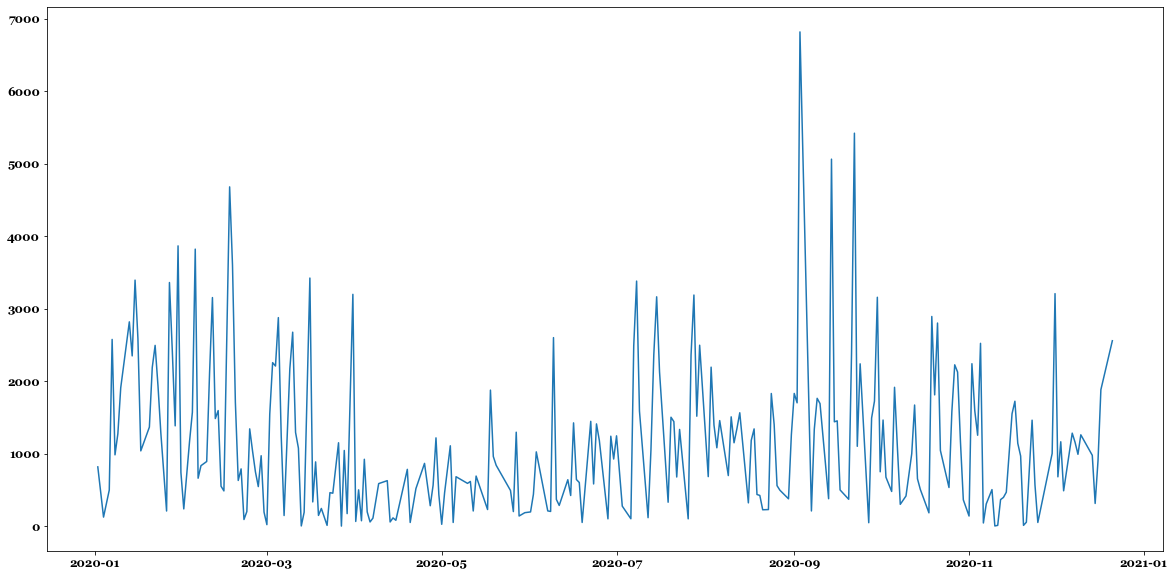

In [86]:
plt.plot(jan_production.index, jan_production.values)

In [87]:
jan_production.mean()

1168.4505426356584

In [91]:
year_2019 = pay[pay['PayDate'].between('2019-01-01', '2019-12-31')]

In [92]:
prod_2019 = year_2019.groupby('PayDate')['PayAmt'].sum()

In [107]:
prod_2019[prod_2019 > 6000]

PayDate
2019-01-28    6376.8
Name: PayAmt, dtype: float64

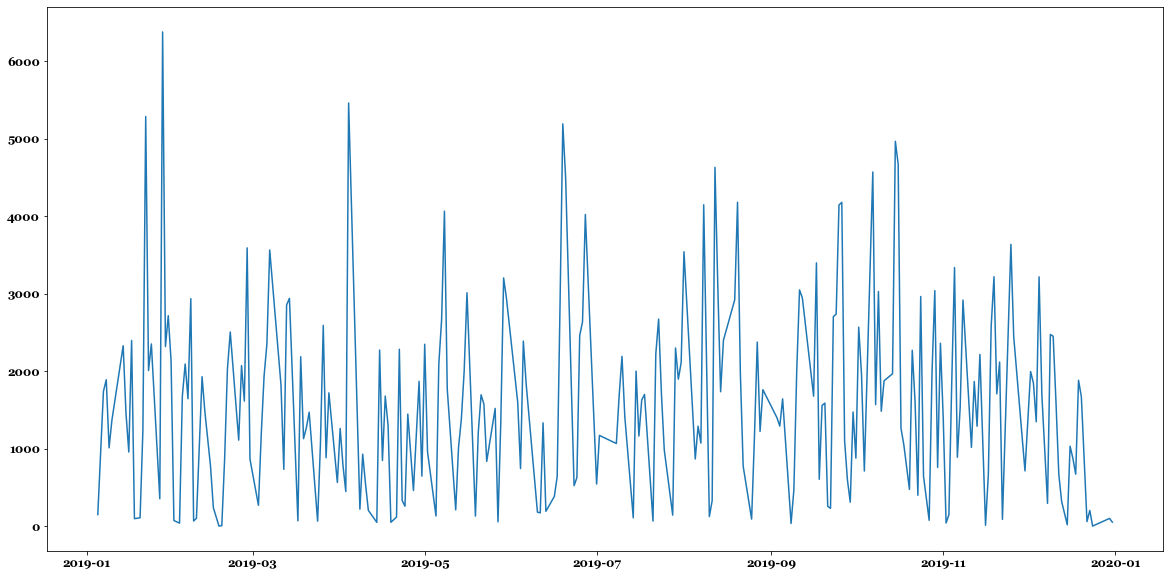

In [95]:
plt.plot(prod_2019.index, prod_2019.values)

In [137]:
def production(start, end, thresh=None):
    range_ = pay[pay['PayDate'].between(start, end)]
    prod_ = range_.groupby('PayDate')['PayAmt'].sum()
    if thresh:
        prod_ = prod_[prod_ <= thresh]
        plt.plot(prod_.index, prod_.values)
    range_mean = prod_.mean()
    return range_mean, prod_

(1469.8168526170791,
 PayDate
 2015-01-05     974.90
 2015-01-06    1360.59
 2015-01-07    3266.00
 2015-01-08    2468.35
 2015-01-09    2419.95
                ...   
 2020-12-14     976.00
 2020-12-15     312.20
 2020-12-16     903.00
 2020-12-17    1881.15
 2020-12-21    2556.50
 Name: PayAmt, Length: 1452, dtype: float64)

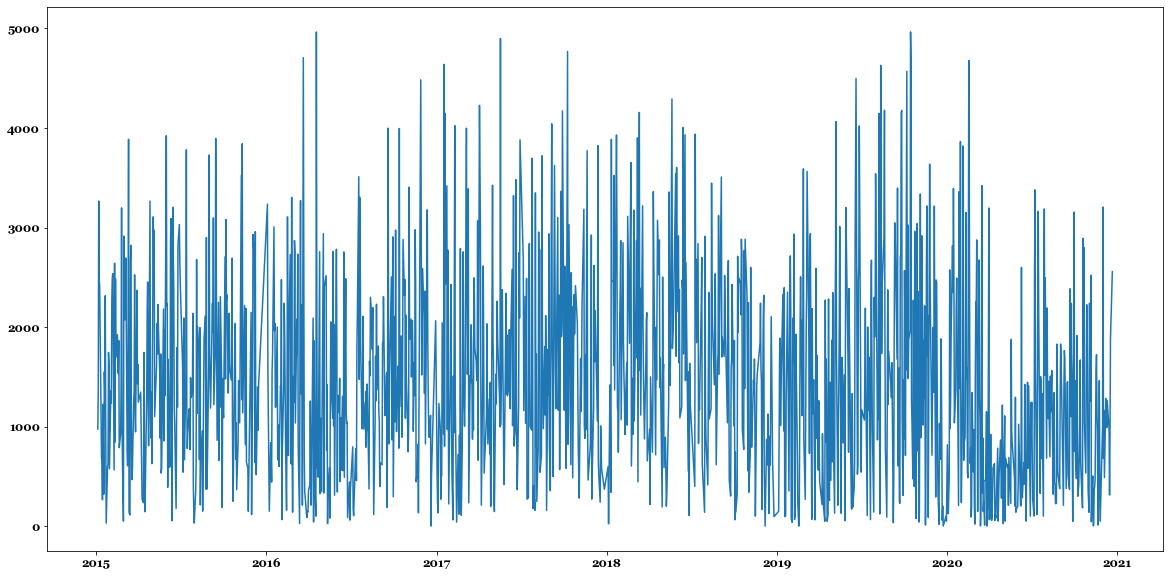

In [139]:
production('2015-01-01', '2021-12-31', thresh=5000)

In [145]:
appt[appt['AptDateTime'] >='2020-12-23'].sort_values('AptDateTime')

,AptNum,PatNum,AptStatus,Confirmed,Op,Note,ProvNum,AptDateTime,InsPlan1,InsPlan2,ProcsColored
15712,67075,8282,5,19,8,"exam, 4BW, Prophy\r\n",10,2021-01-04 07:00:00,893,0,"<span color=""-16777216"">exam</span><span color=""-16777216"">4BW</span><span color=""-16777216"">Prophy</span>"
14826,66189,4433,1,373,1,"exam, 4BW, Prophy\r\n",10,2021-01-04 10:00:00,0,0,"<span color=""-16777216"">exam</span><span color=""-16777216"">4BW</span><span color=""-16777216"">Prophy</span>"
14533,65896,8050,1,373,1,Prophy\r\n,10,2021-01-04 11:00:00,3514,0,"<span color=""-16777216"">Prophy</span>"
14803,66166,1693,1,373,1,"4BW, Prophy\r\n",10,2021-01-04 12:00:00,628,0,"<span color=""-16777216"">4BW</span><span color=""-16777216"">Prophy</span>"
14789,66152,8430,1,373,1,Prophy\r\n,10,2021-01-04 14:00:00,2169,0,"<span color=""-16777216"">Prophy</span>"
...,...,...,...,...,...,...,...,...,...,...,...
15577,66940,8527,1,373,1,Prophy\r\n,10,2021-06-24 09:00:00,3674,0,"<span color=""-16777216"">Prophy</span>"
15941,67304,8274,1,373,3,PerMaint\r\n,15,2021-07-13 08:00:00,0,0,"<span color=""-16777216"">PerMaint</span>"
15940,67303,8273,1,373,1,Prophy\r\n,15,2021-07-13 08:00:00,0,0,"<span color=""-16777216"">Prophy</span>"
16190,67553,6938,1,373,3,"exam, 4BW, PA1st, Prophy\r\n",15,2021-07-13 11:00:00,3019,0,"<span color=""-16777216"">exam</span><span color=""-16777216"">4BW</span><span color=""-16777216"">PA1st</span><span color=""-16777216"">Prophy</span>"


In [151]:
patient_4910 = appt[appt['PatNum'] == 4910].sort_values("AptDateTime")

In [158]:
patient_4910.loc[:, 'AptDateTime'] = patient_4910['AptDateTime'].str[:10]

In [160]:
patient_4910.loc[:, 'AptDateTime'] = pd.to_datetime(patient_4910['AptDateTime'])

In [171]:
pt_4910_diff = patient_4910['AptDateTime'].diff()

In [182]:
stack_4910 = pd.concat([patient_4910['AptDateTime'],pt_4910_diff], axis=1)

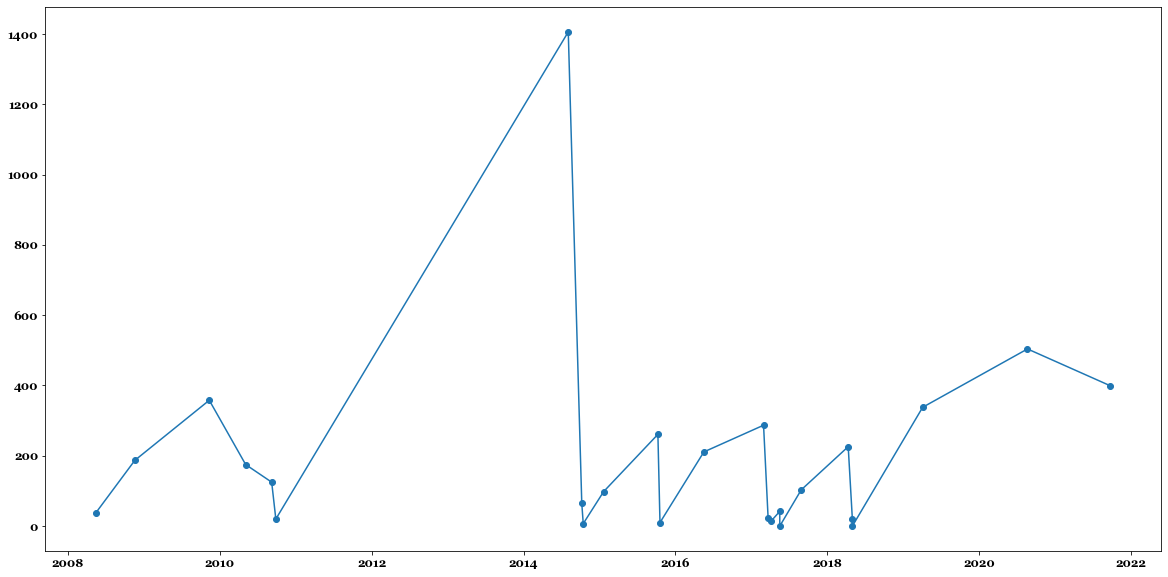

In [188]:
plt.plot(stack_4910['AptDateTime'], stack_4910['Diff'].dt.days)
plt.scatter(stack_4910['AptDateTime'], stack_4910['Diff'].dt.days)

In [247]:
appt['AptDate'] = appt['AptDateTime'].str[:10]

In [200]:
pay.to_csv('data/interm/pay_cleaned.csv', index=False)

In [231]:
drops = appt.groupby('PatNum')['AptDateTime'].count().sort_values(ascending=False).head().index.tolist()

In [336]:
drops3645 = appt[appt['PatNum'] == 3645].index
appt.drop(drops3645, inplace=True)

In [236]:
appt = appt[~appt['PatNum'].isin(drops)]

In [338]:
appt.to_csv('data/interm/appt_cleaned.csv', index=False)

In [262]:
inds = appt[appt['AptDate'] == '0001-01-01'].index.tolist()

In [263]:
appt.drop(inds, inplace=True)

In [267]:
appt.loc[:, 'AptDate'] = pd.to_datetime(appt['AptDate'])

In [346]:
table = appt.loc[:, ['PatNum', 'AptDate']].sort_values(["PatNum", "AptDate"]).set_index('PatNum')
table

,AptDate
PatNum,
3,2003-06-12
3,2003-09-25
3,2003-12-18
3,2004-03-29
3,2004-04-19
...,...
8544,2021-01-13
8546,2021-01-11
8547,2021-02-01


In [325]:
#df = pd.DataFrame.from_dict(my_dict, orient='index')
from collections import defaultdict
new_dict = defaultdict(list)

In [411]:
def create_diff_table(df, cols):
    '''
    Create new df for determining churn patients based on 540 day value
    
    :param df: pandas df
    :cols: list of column names
    '''
    
    #create new table with desired columns
    table = df.loc[:, cols].sort_values(cols).set_index('PatNum')
    #instantiate defaultdict with list
    pat_dict = defaultdict(list)
    #iterate over table values
    for tup in table.iterrows():
        pat_dict[tup[0]].append(tup[1][0])
    for num in pat_dict.keys():
        pat_dict[num].append('2021-01-01')
    #create new DataFrame
    frame = pd.DataFrame.from_dict(pat_dict, orient='index').transpose()
    return frame

In [469]:
df = create_diff_table(appt, ['PatNum', 'AptDate'])
df_date = df.applymap(pd.to_datetime)

In [418]:
diff_days = df.applymap(pd.to_datetime).diff()

In [419]:
num_days = diff_days.apply(lambda x: x.dt.days, axis=1)

In [424]:
#num_days.drop(0, inplace=True)

In [450]:
mask = num_days > 7000
num_days = num_days.where(~mask,other=0)

In [461]:
(num_days[num_days < 0].sum() != 0).sum()

799

In [465]:
len(appt[appt['AptDate'] > '2021-01-01'])

873

In [523]:
window_2016 = df_date[df_date > '2016-01-01']
window_2016_diff = window_2016.diff()
window_2016_diff_days = window_2016_diff.apply(lambda x: x.dt.days, axis=1)
new_mask_neg= window_2016_diff_days < -720
w2016 = window_2016_diff_days.where(~new_mask_neg,other=0)
new_mask_pos = w2016 > 7000
w2016 = w2016.where(~new_mask_pos, other=0)
w2016

,3,14,16,25,26,37,38,44,46,53,67,69,85,108,120,129,133,135,136,142,154,174,177,184,197,199,200,202,203,219,227,270,271,272,273,280,284,289,291,299,307,308,309,316,318,321,322,346,352,373,...,8482,8484,8485,8486,8487,8488,8489,8491,8494,8495,8496,8497,8498,8500,8501,8502,8503,8504,8505,8507,8510,8511,8512,8514,8515,8517,8519,8520,8521,8522,8523,8524,8526,8527,8528,8529,8530,8531,8532,8533,8534,8535,8537,8540,8542,8544,8546,8547,8548,8549
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,33.0,9.0,0.0,0.0,163.0,163.0,0.0,0.0,183.0,183.0,0.0,65.0,108.0,106.0,10.0,184.0,9.0,42.0,81.0,35.0,41.0,50.0,7.0,39.0,0.0,6.0,14.0,5.0,0.0,-5.0,1.0,10.0,13.0,186.0,-10.0,-10.0,-20.0,12.0,0.0,46.0,42.0,1.0,17.0,0.0,-12.0,-10.0,-31.0,-6.0,-4.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,191.0,150.0,29.0,92.0,189.0,0.0,0.0,49.0,0.0,-69.0,-69.0,182.0,0.0,0.0,0.0,0.0,-111.0,0.0,140.0,0.0,23.0,-11.0,-5.0,3.0,0.0,182.0,28.0,48.0,10.0,49.0,0.0,188.0,0.0,56.0,-164.0,0.0,0.0,0.0,24.0,23.0,14.0,-24.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-5.0,-20.0,124.0,97.0,-39.0,0.0,0.0,48.0,35.0,0.0,0.0,-73.0,0.0,0.0,0.0,0.0,0.0,119.0,-123.0,0.0,0.0,0.0,0.0,29.0,0.0,-150.0,6.0,-31.0,0.0,-20.0,0.0,-173.0,0.0,129.0,0.0,0.0,0.0,0.0,152.0,0.0,-38.0,0.0,68.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,10.0,-39.0,0.0,0.0,0.0,29.0,83.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-103.0,0.0,0.0,131.0,0.0,0.0,0.0,0.0,0.0,-10.0,0.0,0.0,0.0,0.0,0.0,0.0,-174.0,0.0,0.0,0.0,0.0,-165.0,0.0,0.0,0.0,-80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43.0,105.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-109.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,-95.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [524]:
good_cols = w2016.columns[w2016.sum() != 0]

In [525]:
final_w2016 = w2016.loc[:, good_cols]

In [526]:
final_w2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Columns: 2433 entries, 3 to 8549
dtypes: float64(2433)
memory usage: 2.2 MB


In [551]:
pb = 2433

for x in range(180, 725, 180):
    total_churned = sum(final_w2016[final_w2016 > x].sum() != 0)
    print(f'\nActive Patient Base at window {x} days: {pb - total_churned}')
    print(f'Total raw churn: {total_churned} patients')
    print(f'Percent churned of active patient base: {round(total_churned/pb * 100, 2)}%\n')


Active Patient Base at window 180 days: 115
Total raw churn: 2318 patients
Percent churned of active patient base: 95.27%


Active Patient Base at window 360 days: 909
Total raw churn: 1524 patients
Percent churned of active patient base: 62.64%


Active Patient Base at window 540 days: 1281
Total raw churn: 1152 patients
Percent churned of active patient base: 47.35%


Active Patient Base at window 720 days: 1505
Total raw churn: 928 patients
Percent churned of active patient base: 38.14%



In [546]:
sum(final_w2016[final_w2016 > 540].sum() != 0)

1152